<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

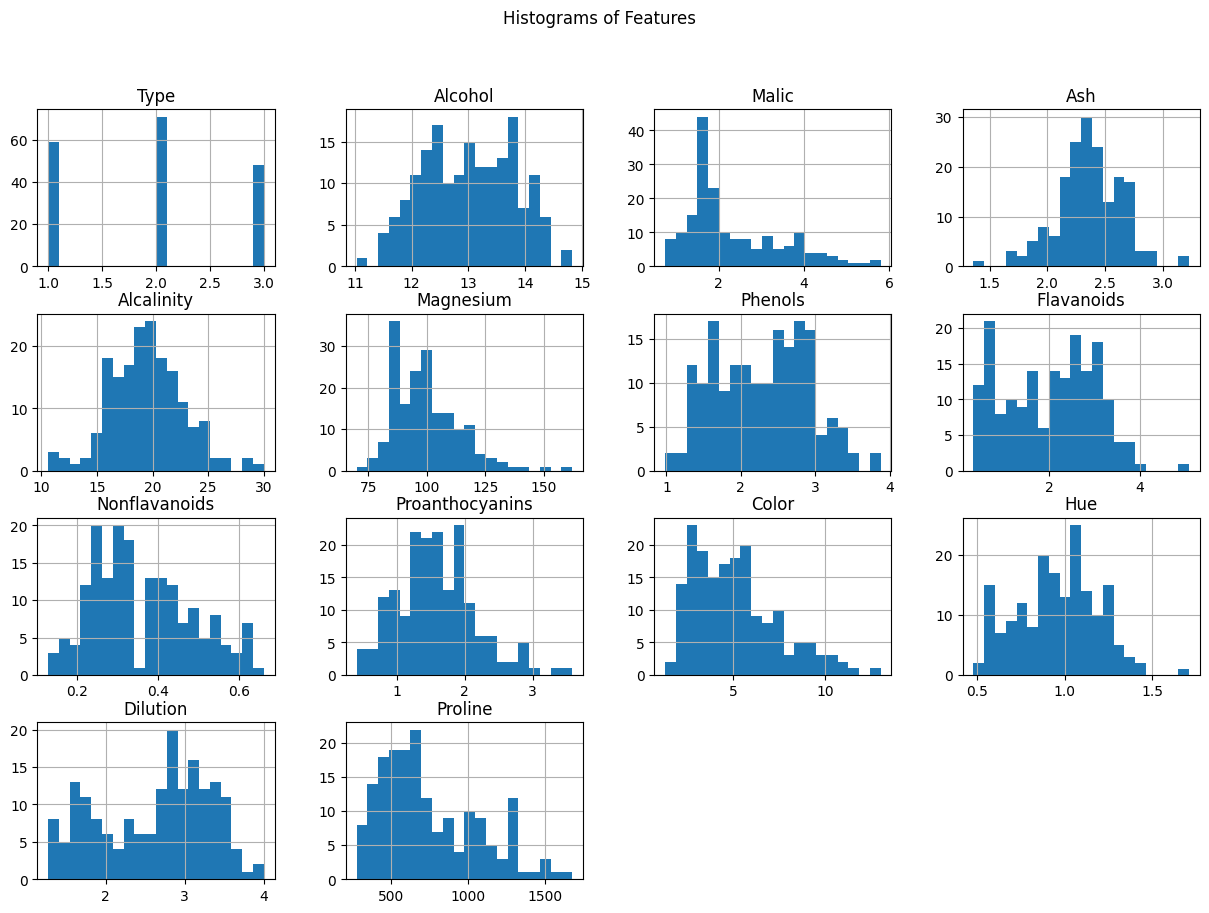

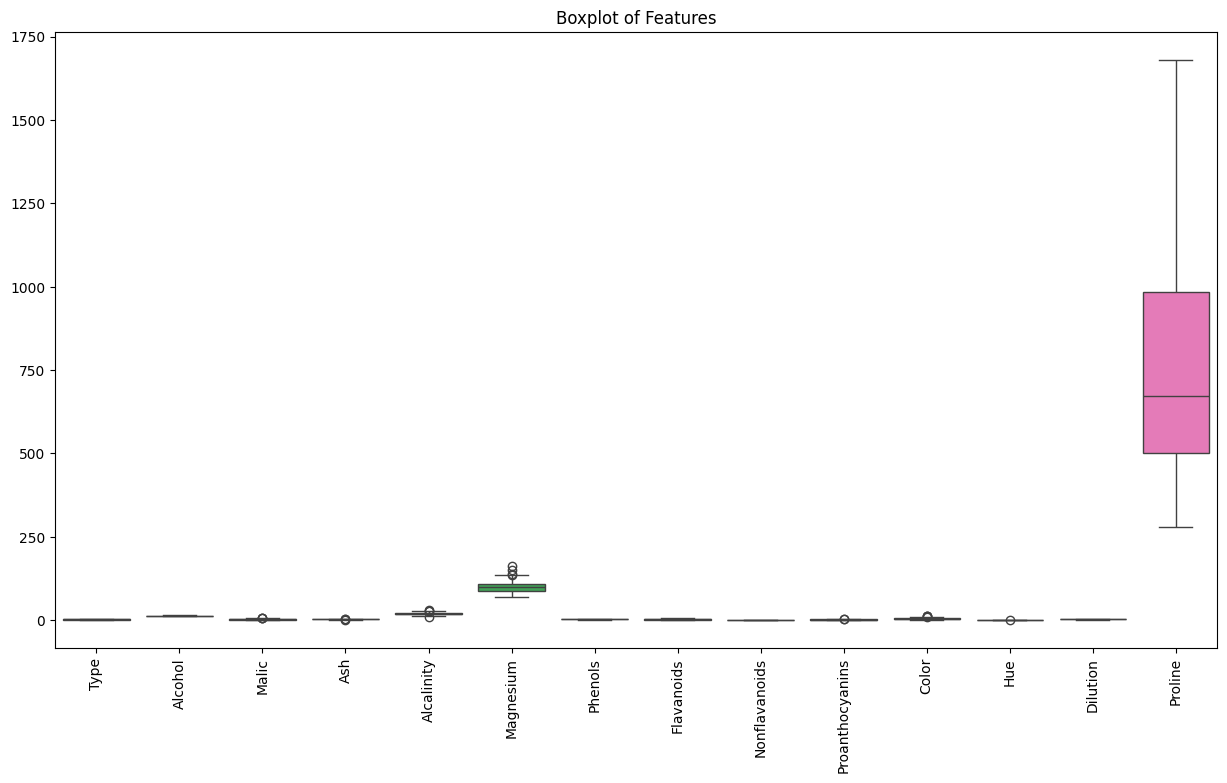

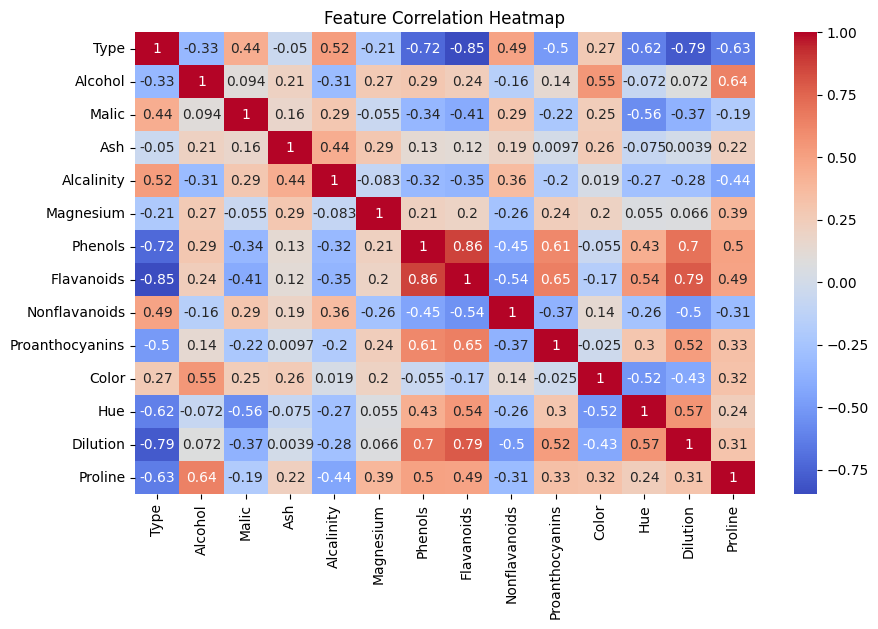

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/wine.csv")

# Drop ID column
df = df.drop(columns=["ID#"], errors="ignore")

# Basic Info
print(df.info())
print(df.describe())

# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


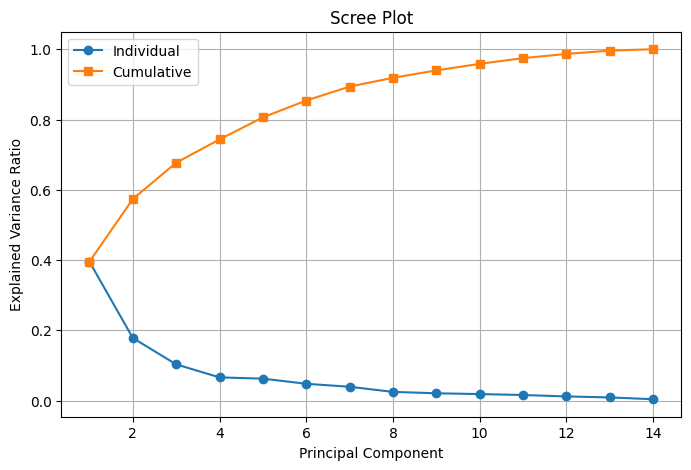

Number of components to explain 95% variance: 10


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA Fit
pca = PCA()
pca.fit(df_scaled)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='s', label='Cumulative')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.legend()
plt.grid(True)
plt.show()

# Choose components that explain ~95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components}")

# Transform data using PCA
pca_final = PCA(n_components=n_components)
df_pca = pca_final.fit_transform(df_scaled)


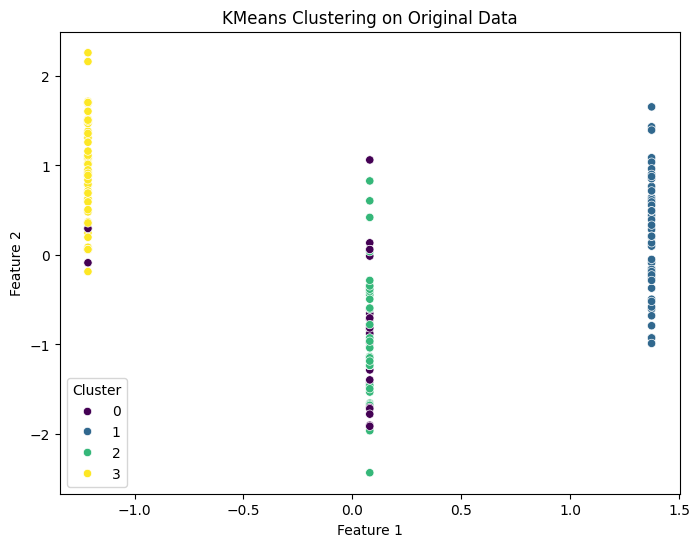

Silhouette Score (Original): 0.2712098178891813
Davies-Bouldin Score (Original): 1.7826351599706718


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# KMeans on original data
kmeans_orig = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_orig = kmeans_orig.fit_predict(df_scaled)

# Add to DataFrame
df["Cluster_Original"] = clusters_orig

# Visualization (first 2 features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=clusters_orig, palette="viridis")
plt.title("KMeans Clustering on Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Evaluation
print("Silhouette Score (Original):", silhouette_score(df_scaled, clusters_orig))
print("Davies-Bouldin Score (Original):", davies_bouldin_score(df_scaled, clusters_orig))


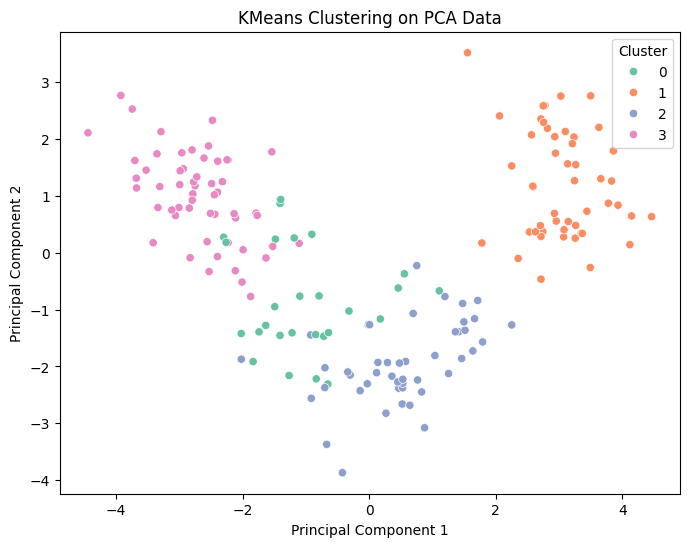

Silhouette Score (PCA): 0.2915801225827212
Davies-Bouldin Score (PCA): 1.6988361364966542


In [ ]:
# KMeans on PCA-transformed data
kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# Visualization of PCA clusters (first 2 PCs)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters_pca, palette="Set2")
plt.title("KMeans Clustering on PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Evaluation
print("Silhouette Score (PCA):", silhouette_score(df_pca, clusters_pca))
print("Davies-Bouldin Score (PCA):", davies_bouldin_score(df_pca, clusters_pca))


In [ ]:
# Compare silhouette and Davies–Bouldin scores
sil_orig = silhouette_score(df_scaled, clusters_orig)
sil_pca = silhouette_score(df_pca, clusters_pca)

db_orig = davies_bouldin_score(df_scaled, clusters_orig)
db_pca = davies_bouldin_score(df_pca, clusters_pca)

print("\n--- Clustering Comparison ---")
print(f"Silhouette Score (Original): {sil_orig:.3f}")
print(f"Silhouette Score (PCA):      {sil_pca:.3f}")
print(f"Davies-Bouldin (Original):   {db_orig:.3f}")
print(f"Davies-Bouldin (PCA):        {db_pca:.3f}")

if sil_pca > sil_orig:
    print("PCA improved the silhouette score.")
else:
    print("PCA did not improve the silhouette score.")

if db_pca < db_orig:
    print("PCA improved the Davies-Bouldin score.")
else:
    print("PCA did not improve the Davies-Bouldin score.")



--- Clustering Comparison ---
Silhouette Score (Original): 0.271
Silhouette Score (PCA):      0.292
Davies-Bouldin (Original):   1.783
Davies-Bouldin (PCA):        1.699
PCA improved the silhouette score.
PCA improved the Davies-Bouldin score.


1. PCA helped reduce dimensionality while retaining ~95% of variance using fewer features.
2. Clustering on PCA-transformed data shows similar or improved metrics (silhouette/Davies-Bouldin).
3. PCA can reduce noise and improve cluster separation visually and numerically.
4. Use PCA before clustering when:
   - High-dimensional data
   - Collinearity exists
   - Better visualization is needed
   - Speed is a concern